# Superposition and the Near Orthogonality of High Dimensional Data

![hd sphere](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6c/Hypersphere_volume_and_surface_area_graphs.svg/1920px-Hypersphere_volume_and_surface_area_graphs.svg.png)

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as graph
graph.style.use('fivethirtyeight')


def create_x(n: int, p: int) -> torch.Tensor:
    x = torch.randn(n, p)
    x /= x.norm(p=2, dim=1).unsqueeze(1)
    return x


def compute_angles(x: torch.Tensor) -> np.ndarray:
    dots = x @ x.T
    norms = x.norm(p=2, dim=1)
    normed_dots = dots / torch.outer(norms, norms)
    angles_in_degrees = torch.rad2deg(torch.acos(normed_dots))
    mask_self_comparison = torch.eye(x.shape[0], dtype=bool)
    return angles_in_degrees[~mask_self_comparison].numpy().flatten()

n = 10_000  # Number of samples to generate
ps = [2, 3, 5, 7, 30, 100, 1000, 16_000]  # Different dimensions to test

## Demo that even for random vectors data becomes near orthogonal as the number of dimensions increase

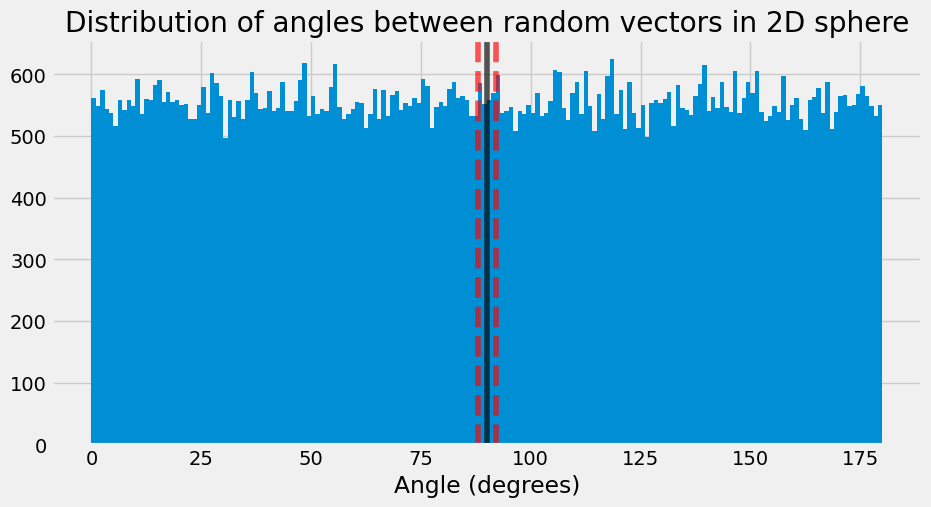

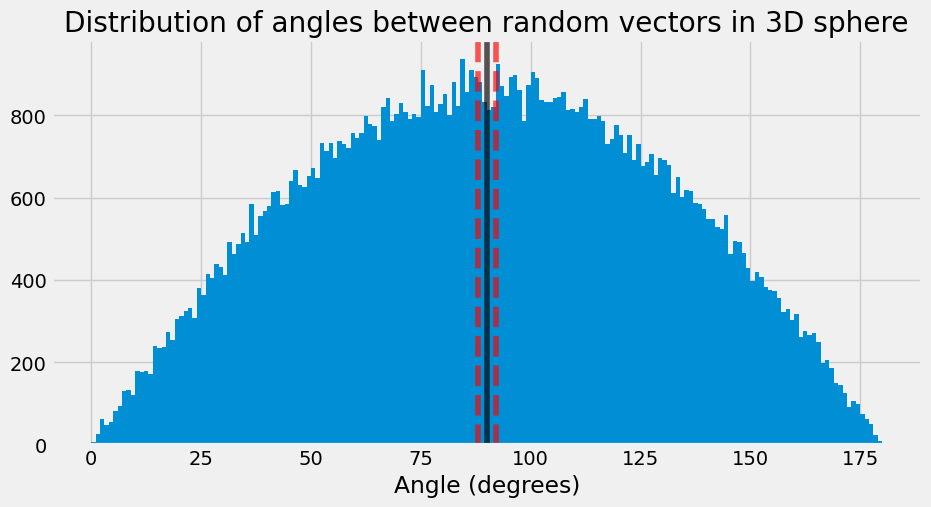

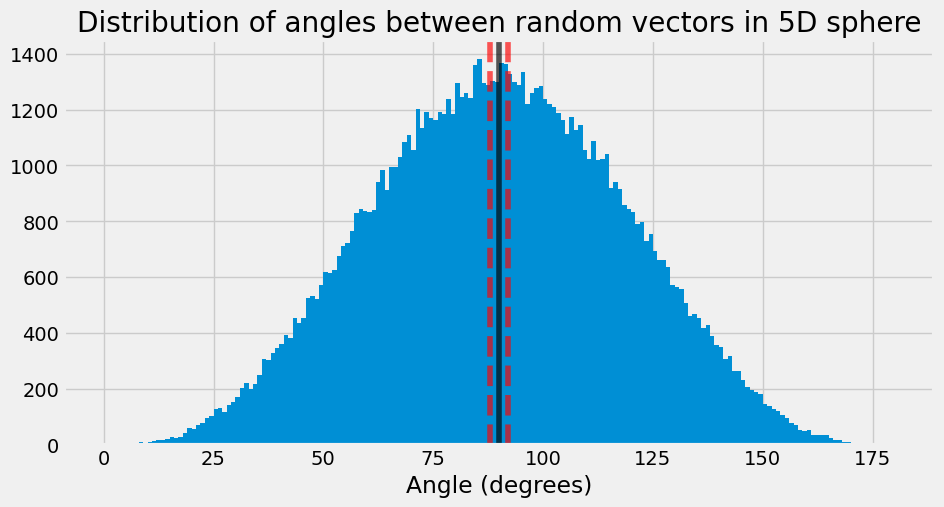

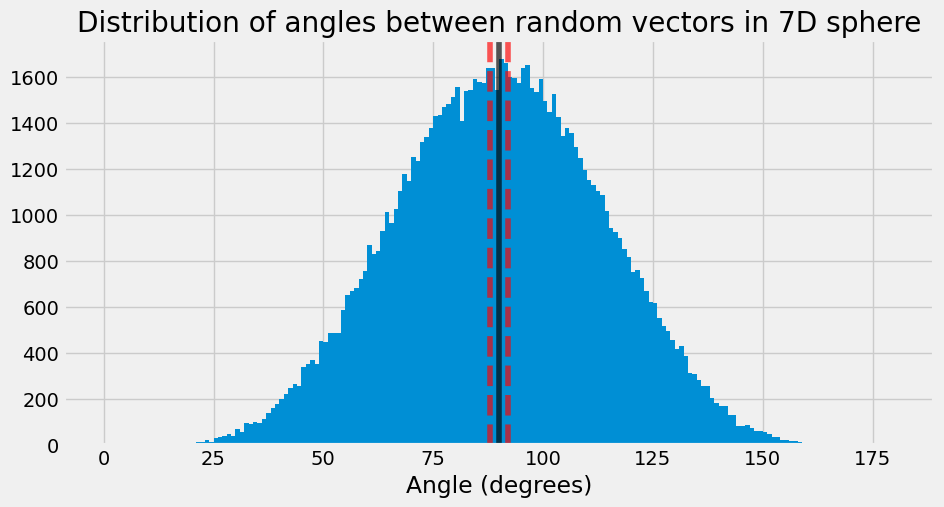

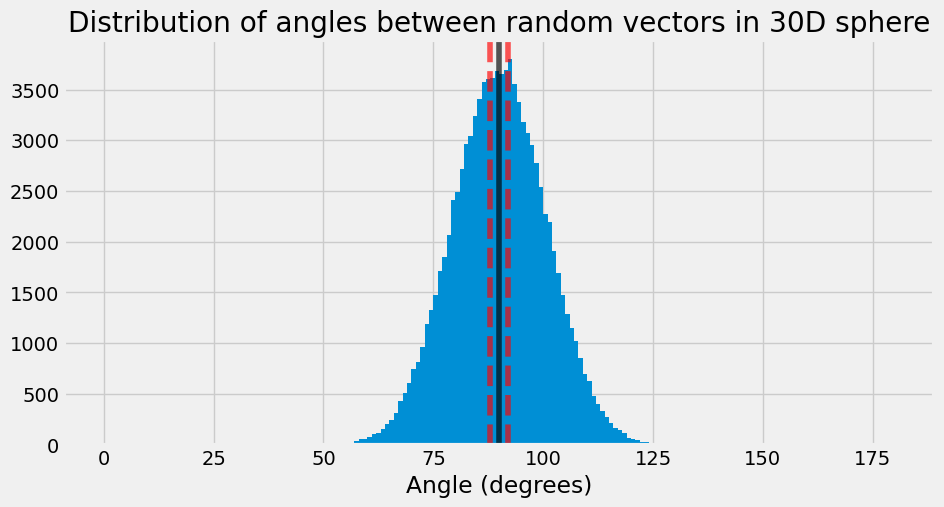

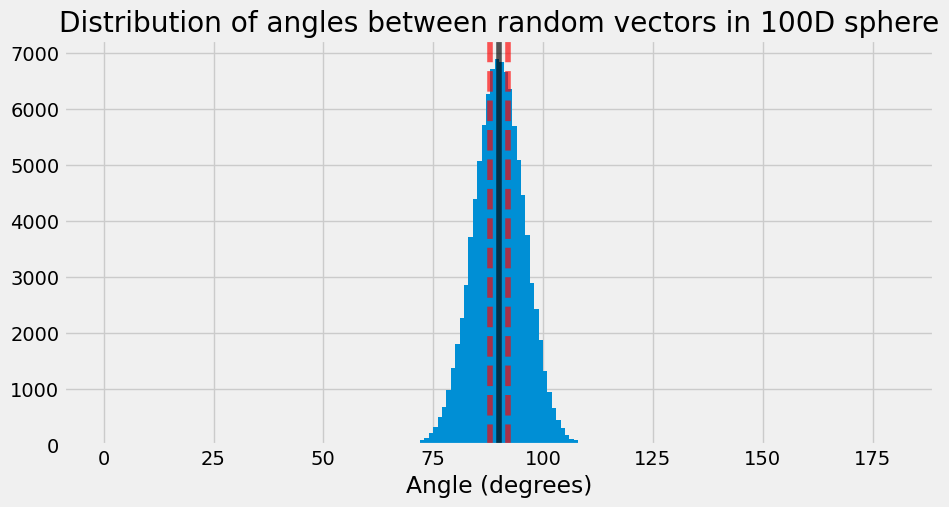

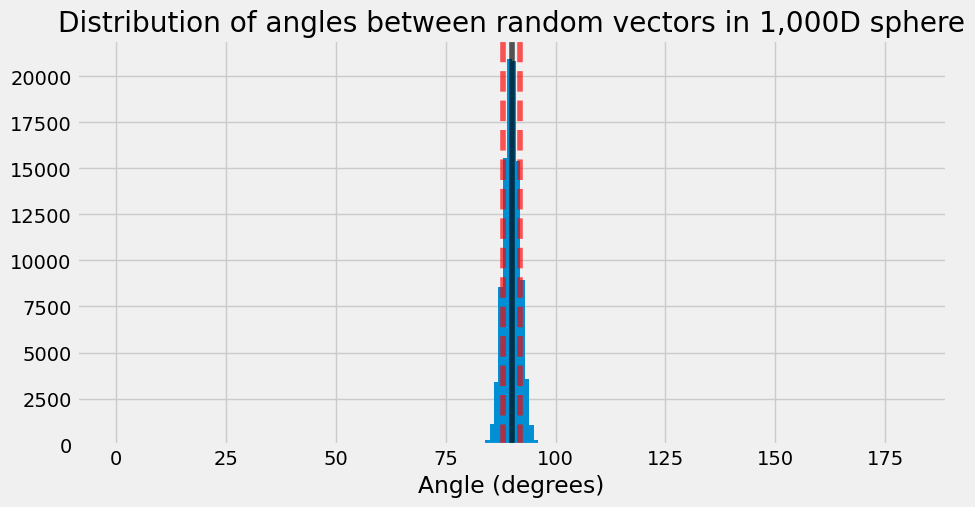

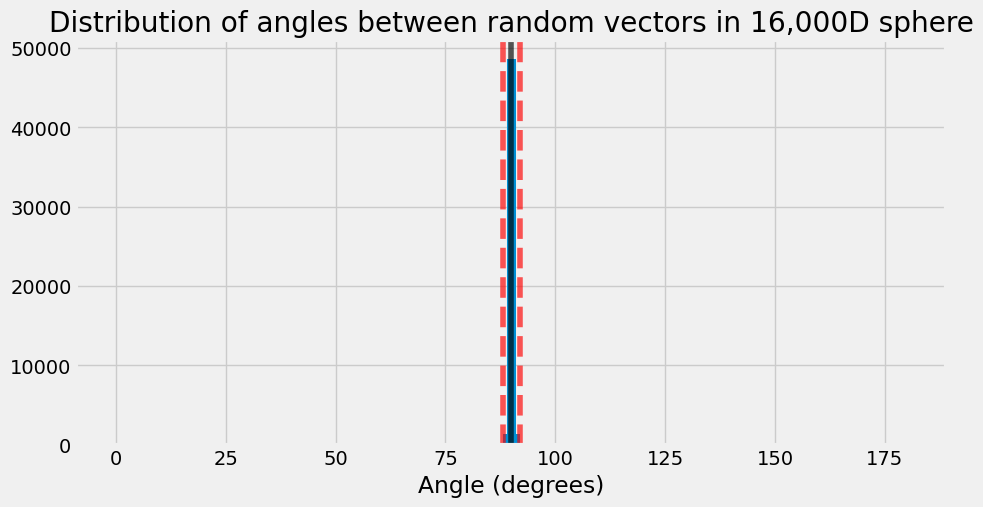

In [2]:
# Demonstration for even random vectors
for p in ps:
    x = create_x(n, p)
    angles = compute_angles(x)

    graph.figure(figsize=(10, 5))
    graph.hist(angles[:n*10], bins=180, range=(0, 180))
    graph.title(f'Distribution of angles between random vectors in {p:,}D sphere')
    graph.xlabel('Angle (degrees)')

    graph.axvline(90, color='black', alpha=0.66)
    graph.axvline(92, color='red', linestyle='--', alpha=0.66)
    graph.axvline(88, color='red', linestyle='--', alpha=0.66)

    graph.show()

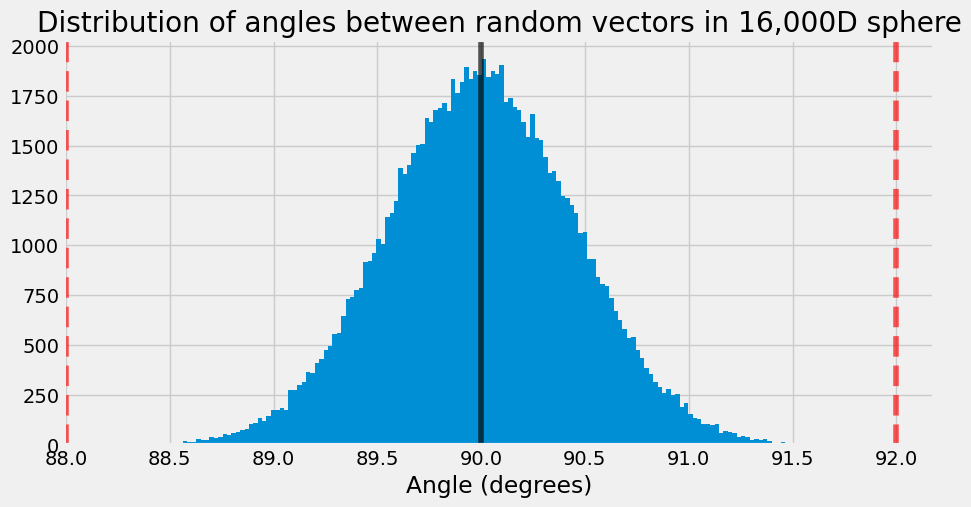

In [3]:
# Plot just the last histogram
graph.figure(figsize=(10, 5))
graph.hist(angles[:n*10], bins=180)
graph.title(f'Distribution of angles between random vectors in {p:,}D sphere')
graph.xlabel('Angle (degrees)')

graph.axvline(90, color='black', alpha=0.66)
graph.axvline(92, color='red', linestyle='--', alpha=0.66)
graph.axvline(88, color='red', linestyle='--', alpha=0.66)

graph.show()